In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import numpy as np
import seaborn as sns

In [2]:
preds = [6399038000, 8240000000,11310237000,12208281000,11361323000,10803387000,12348385000,13074100000, 12857667000,17743400000,21145200000]
true = [8613483384.46, 11334538970.16,10813732699.53, 8101885886.87,8916328469.16, 9962889434.44, 11518070774.48,11700807336.31,16900358608,17336881098.56,15165765187.88]
years = range(2010,2021)

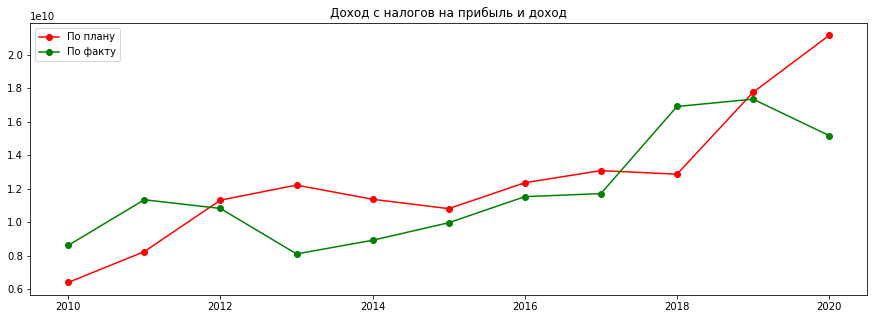

In [77]:
fig, axes = plt.subplots(figsize=(15,5))
axes.plot(years,preds,'r-o',label='По плану')
axes.plot(years,true,'g-o',label='По факту')
axes.legend()
axes.set_title('Доход с налогов на прибыль и доход')
plt.show()

In [78]:
abs(np.array(preds)-np.array(true)).mean()/10**10

0.23481480068536362

In [229]:
path = 'data/predictions_budget/'
def remove_star(x):
    try:
        x= x.replace('*','')
    except:
        pass
    try:
        x= x.replace(' ','')
    except:
        pass
    try:
        x= x.replace(',','.')
    except:
        pass
    return x
def before_twety_eighteen(name,ax):
    try:
        df = pd.read_excel(path+name, header=[2,3]).dropna(how='any')
    except:
        df = pd.read_excel(path+name, header=[4,5]).dropna(how='any')
    main_year = (name[:4])
    df=df.drop(labels=[(            'Единицы',          'измерения'),
                       (f'{main_year} год    прогноз',          'вариант 1'),
                       ( f'{str(int(main_year)+1)} год   прогноз',          'вариант 1'),
                       (f'{str(int(main_year)+2)} год   прогноз',          'вариант 1')],
               axis='columns')
    df=df.T
    df = df.rename(columns=df.iloc[0])
    df=df.drop((         'Показатели', 'Unnamed: 0_level_1'),axis='index').applymap(remove_star)
    return sns.heatmap(abs(df.astype('float64').corr()),ax=ax,xticklabels=False, yticklabels=False)

In [230]:
def twenty_eighteen(name,ax):
    path = 'data/predictions_budget/'
    try:
        df = pd.read_excel(path+name, header=[2,3]).dropna(how='any') 
    except:
        df = pd.read_excel(path+name, header=[1,3]).dropna(how='any') 
    main_year = (name[:4])
    df = df.drop(labels=[
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов','Единицы измерения'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{main_year} год прогноз'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{main_year} год прогноз.2'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+1)} год прогноз'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+1)} год прогноз.2'),    
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+2)} год прогноз'),
    (f'прогноза социально-экономического развития Республики Карелия на {main_year} год и плановый период {str(int(main_year)+1)} и {str(int(main_year)+2)} годов',f'{str(int(main_year)+2)} год прогноз.2')
    ],axis='columns')
    df = df.T.applymap(remove_star)
    df = df.rename(columns=df.iloc[0])
    df=df.drop(df.index[0],axis='index')
    return sns.heatmap(abs(df.astype('float64').corr()),ax=ax,xticklabels=False, yticklabels=False)

In [231]:
file0 = '2010-2012.xls'
file1 = '2011-2013.xls'
file2 = '2020-2022.xls'
file3 = '2019-2021.xls'

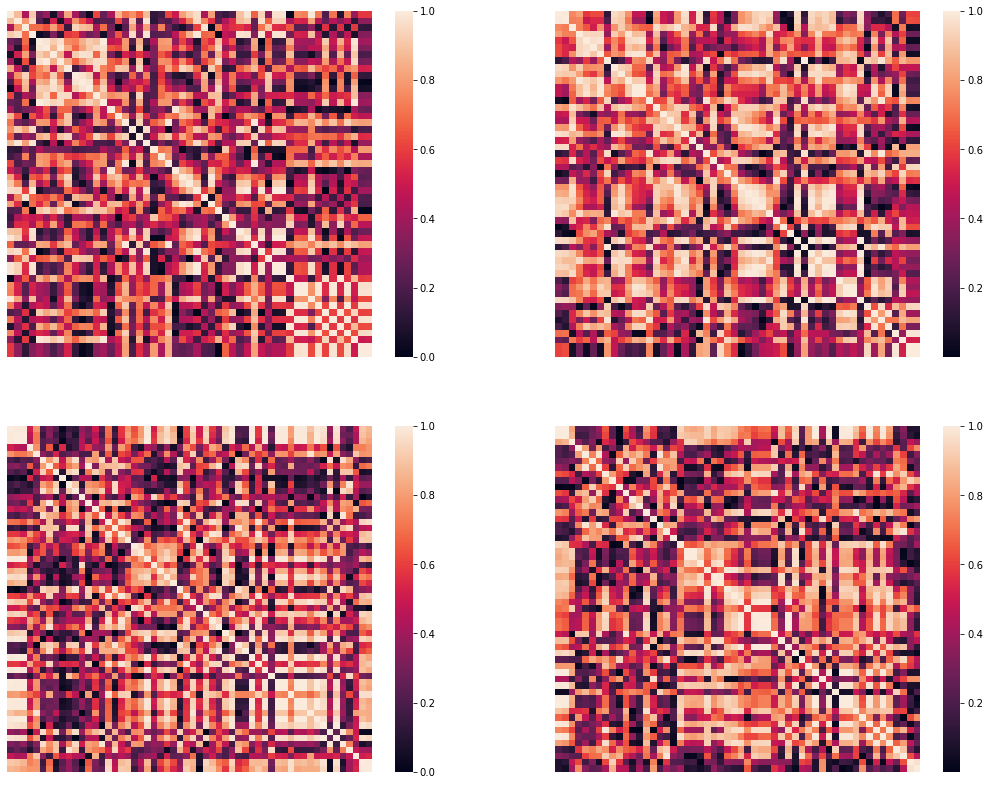

In [233]:
corr = df.applymap(remove_star).corr()
%matplotlib inline
fig, ax = plt.subplots(2,2,figsize=(18,14))
before_twety_eighteen(file0,ax[0][0])
before_twety_eighteen(file1,ax[0][1])
twenty_eighteen(file3, ax[1][0])
twenty_eighteen(file2,ax[1][1])
plt.show()


/Users/denis/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


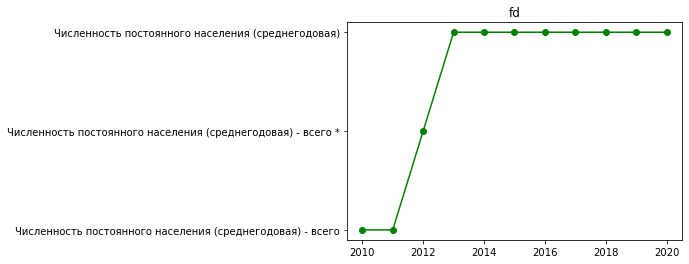

In [290]:
feature = 'Численность постоянного населения (среднегодовая)'
ans = []
idx = 0
for y in years:
    df = pd.read_excel(path+str(f'{y}-{y+2}.xls'), header=0).dropna(how='any')
    values = df.iloc[idx].values
    ans.append(values[2])
plt.plot(years,ans,'g-o')
plt.title('fd')
plt.show()